In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Filepath
filepath = "Attributes_DataFrame.csv"

# Read the CSV file, converting relevant columns to correct data types
df = pd.read_csv(filepath, dtype={'Domestic': float, 'International': float, 'Budget': float})

# Drop rows where the `Budget` column is null
df = df.dropna(subset=['Budget'])

# Create new columns using assign and store in a new variable
# This line starts the creation of a new DataFrame called df_modified by using the assign method in Pandas. 
# This method allows you to create new columns in a DataFrame based on existing columns.
df_modified = df.assign(
    # This line creates a new column named num_genre in the df_modified DataFrame.
    # It calculates the number of genres for each movie by splitting the values in the 'Genres' column using a semicolon as the delimiter 
    # and then counting the number of resulting elements in the list.
    num_genre=df['Genres'].astype(str).str.split(';').str.len(),
    # This line randomly selects one genre from the list of genres for each book in the 'Genres' column. 
    # The apply method with a lambda function is used to achieve this random selection.
    main_genre=df['Genres'].astype(str).str.split(';').apply(lambda x: np.random.choice(x)),
    # This line calculates the total revenue for each book by adding the 'Domestic' and 'International' revenue columns. 
    # Any missing values are filled with 0 using the fillna method.
    total_revenue=df['Domestic'].fillna(0) + df['International'].fillna(0),
    # This line removes the year information enclosed in parentheses from the 'Title' column by using a regular expression pattern to replace it with an empty string.
    title_without_year=df['Title'].astype(str).str.replace(r"\([^()]*\)", "", regex=True),
    # This line extracts the year information from the 'Title' column using a regular expression pattern and converts it to a numeric data type using pd.to_numeric.
    year=pd.to_numeric(df['Title'].astype(str).str.extract(r'\((\d+)\)')[0])  # Extract and convert to numeric
)
# Convert financial columns to integers
# This code fills any missing values in the 'Domestic' column with 0 using fillna(0) and then converts the values in the column to integers using astype(int).
df_modified['Domestic'] = df_modified['Domestic'].fillna(0).astype(int)
df_modified['International'] = df_modified['International'].fillna(0).astype(int)
df_modified['Budget'] = df_modified['Budget'].fillna(0).astype(int)
df_modified['total_revenue'] = df_modified['total_revenue'].astype(int)

# Create new columns for currency display
df_modified['Budget_$'] = df_modified['Budget'].apply(lambda x: f'${x:,.0f}')
df_modified['Domestic_$'] = df_modified['Domestic'].apply(lambda x: f'${x:,.0f}')
df_modified['International_$'] = df_modified['International'].apply(lambda x: f'${x:,.0f}')
df_modified['total_revenue_$'] = df_modified['total_revenue'].apply(lambda x: f'${x:,.0f}')

# Preprocessing steps with method chaining on df_modified
df_modified = (
    df_modified
    .loc[~((df_modified['num_genre'] > 1) & (df_modified['main_genre'] == 'Drama'))]  # Filter after creating new columns
    .sort_values(by='total_revenue', ascending=False)
    [['title_without_year', 'year', 'main_genre', 'MPAA-Rating', 'Runtime',
      'Distributor', 'Budget_$', 'Domestic_$', 'International_$', 'total_revenue_$']]  # Display currency columns
)

In [3]:
df_modified.head()

,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$
1,Star Wars: Episode VII - The Force Awakens,2015,Action,PG-13,138,Walt Disney Studios Motion Pictures,"$245,000,000","$936,662,225","$1,131,561,399","$2,068,223,624"
0,Jurassic World,2015,Action,PG-13,124,Universal Pictures,"$150,000,000","$652,270,625","$1,018,130,012","$1,670,400,637"
128,The Avengers,2012,Adventure,PG-13,143,Walt Disney Studios Motion Pictures,"$220,000,000","$623,357,910","$895,455,078","$1,518,812,988"
4,Furious 7,2015,Action,PG-13,137,Universal Pictures,"$190,000,000","$353,007,020","$1,162,040,651","$1,515,047,671"
190,Frozen II,2019,Musical,PG,103,Walt Disney Studios Motion Pictures,"$150,000,000","$477,373,578","$972,653,355","$1,450,026,933"


In [4]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 1 to 103
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title_without_year  1997 non-null   object
 1   year                1997 non-null   int64 
 2   main_genre          1997 non-null   object
 3   MPAA-Rating         1950 non-null   object
 4   Runtime             1997 non-null   int64 
 5   Distributor         1997 non-null   object
 6   Budget_$            1997 non-null   object
 7   Domestic_$          1997 non-null   object
 8   International_$     1997 non-null   object
 9   total_revenue_$     1997 non-null   object
dtypes: int64(2), object(8)
memory usage: 171.6+ KB


In [5]:
df_modified.describe()

,year,Runtime
count,1997.000000,1997.000000
mean,2009.596895,108.640461
std,5.743538,18.030922
min,1999.000000,63.000000
25%,2005.000000,95.000000
50%,2010.000000,106.000000
75%,2014.000000,119.000000
max,2020.000000,219.000000


In [6]:
df_modified.dtypes

title_without_year    object
year                   int64
main_genre            object
MPAA-Rating           object
Runtime                int64
Distributor           object
Budget_$              object
Domestic_$            object
International_$       object
total_revenue_$       object
dtype: object

In [7]:
# Clean 'budget' column by removing dollar sign and commas
df_modified['Budget_$'] = df_modified['Budget_$'].str.replace('[$,]', '', regex=True)
df_modified['total_revenue_$'] = df_modified['total_revenue_$'].str.replace('[$,]', '', regex=True)

In [8]:
# Convert 'total_revenue' and 'budget' columns to numeric data types
df_modified['total_revenue_$'] = pd.to_numeric(df_modified['total_revenue_$'], errors='coerce')
df_modified['Budget_$'] = pd.to_numeric(df_modified['Budget_$'], errors='coerce')

In [9]:
# Create the 'profit' column
df_modified['profit'] = df_modified['total_revenue_$'] - df_modified['Budget_$']

In [10]:
df_modified.head()

,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$,profit
1,Star Wars: Episode VII - The Force Awakens,2015,Action,PG-13,138,Walt Disney Studios Motion Pictures,245000000,"$936,662,225","$1,131,561,399",2068223624,1823223624
0,Jurassic World,2015,Action,PG-13,124,Universal Pictures,150000000,"$652,270,625","$1,018,130,012",1670400637,1520400637
128,The Avengers,2012,Adventure,PG-13,143,Walt Disney Studios Motion Pictures,220000000,"$623,357,910","$895,455,078",1518812988,1298812988
4,Furious 7,2015,Action,PG-13,137,Universal Pictures,190000000,"$353,007,020","$1,162,040,651",1515047671,1325047671
190,Frozen II,2019,Musical,PG,103,Walt Disney Studios Motion Pictures,150000000,"$477,373,578","$972,653,355",1450026933,1300026933


In [11]:
avg_profit_by_distributor = df_modified.groupby('Distributor')['profit'].mean()
# Set display format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Sort the average profit values in ascending order
# avg_profit_by_distributor = avg_profit_by_distributor.sort_values()
avg_profit_by_distributor = pd.DataFrame(avg_profit_by_distributor)
avg_profit_by_distributor

,profit
Distributor,
20th Century Studios,-23894503.00
8x Entertainment,-6271550.00
A24,44377528.50
Affirm Films,18484334.00
Annapurna Pictures,-10644900.00
...,...
Warner Bros.,132317872.57
Warner Independent Pictures (WIP),47641191.00
Yari Film Group Releasing,71392388.00


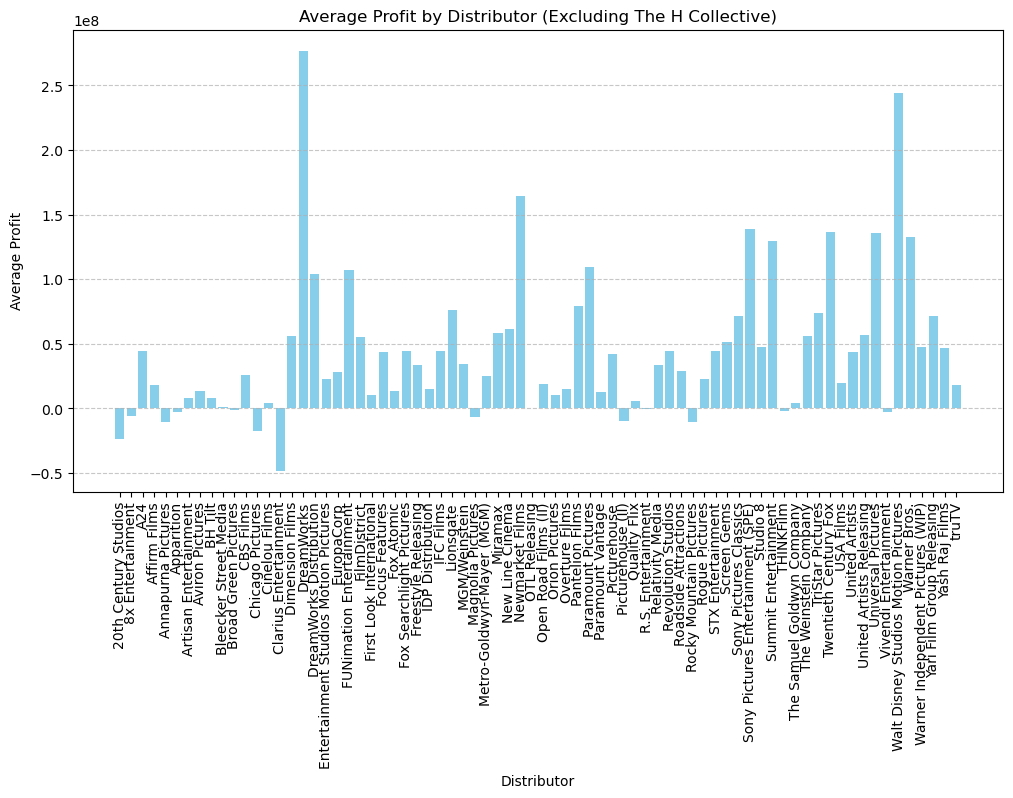

In [12]:
# Filter out 'The H Collective' from the DataFrame
filtered_df = avg_profit_by_distributor[avg_profit_by_distributor.index != 'The H Collective']

# Create a bar chart with the filtered data
plt.figure(figsize=(12, 6))
plt.bar(filtered_df.index, filtered_df['profit'], color='skyblue')
plt.xlabel('Distributor')
plt.ylabel('Average Profit')
plt.title('Average Profit by Distributor (Excluding The H Collective)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

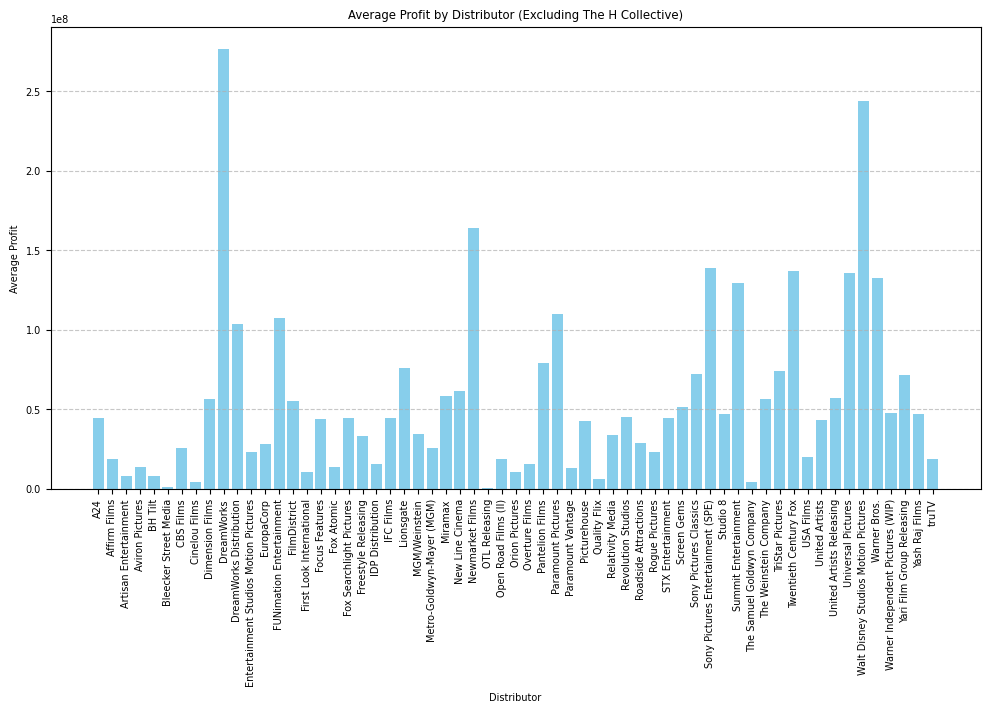

In [45]:
# Filter out negative profit values and 'The H Collective' distributor
filtered_df = avg_profit_by_distributor[(avg_profit_by_distributor['profit'] >= 0) & (avg_profit_by_distributor.index != 'The H Collective')]

# Create a bar chart with the filtered data
plt.figure(figsize=(12, 6))
plt.bar(filtered_df.index, filtered_df['profit'], color='skyblue')
plt.xlabel('Distributor')
plt.ylabel('Average Profit')
plt.title('Average Profit by Distributor (Excluding The H Collective)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

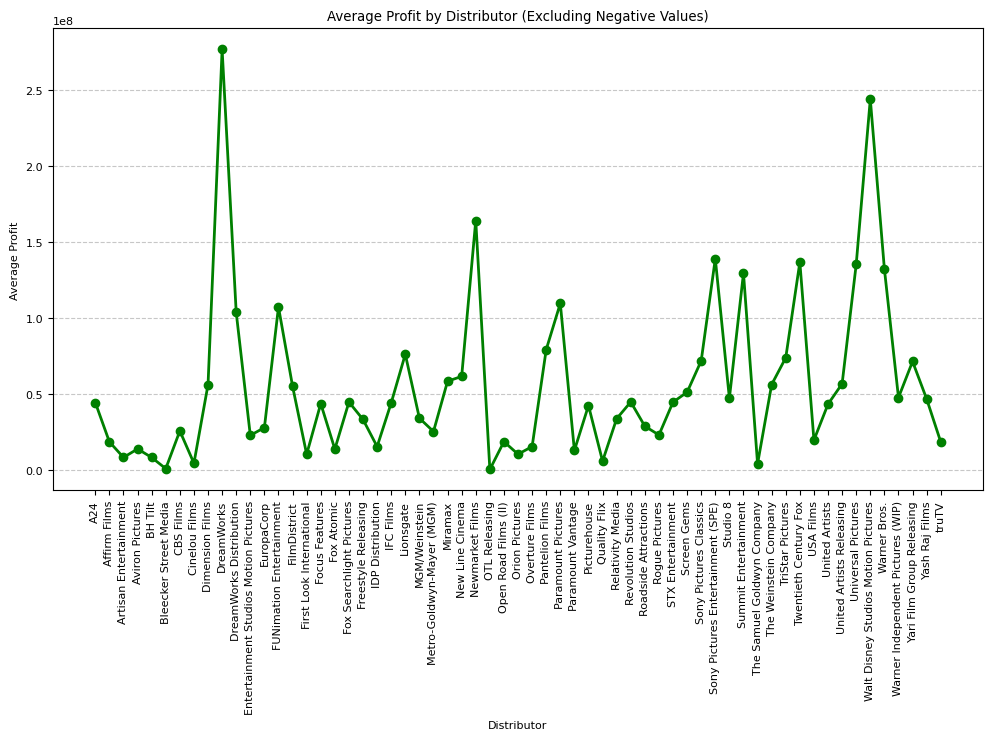

In [28]:
# Filter out negative profit values and 'The H Collective' distributor
filtered_df = avg_profit_by_distributor[(avg_profit_by_distributor['profit'] >= 0) & (avg_profit_by_distributor.index != 'The H Collective')]

# Create a line chart with the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['profit'], marker='o', color='green', linestyle='-', linewidth=2)
plt.xlabel('Distributor')
plt.ylabel('Average Profit')
plt.title('Average Profit by Distributor (Excluding Negative Values)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
# # Filter out negative profit values and 'The H Collective' distributor
# filtered_df = avg_profit_by_distributor[(avg_profit_by_distributor['profit'] >= 0) & (avg_profit_by_distributor.index != 'The H Collective')]

# # Create a pie chart with the filtered data
# # Decrease the font size for the pie chart labels
# plt.rcParams['font.size'] = 7
# plt.figure(figsize=(10, 10))
# plt.pie(filtered_df['profit'], labels=filtered_df.index, startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# # plt.title('Distribution of Average Profit by Distributor (Excluding The H Collective)')
# plt.show()

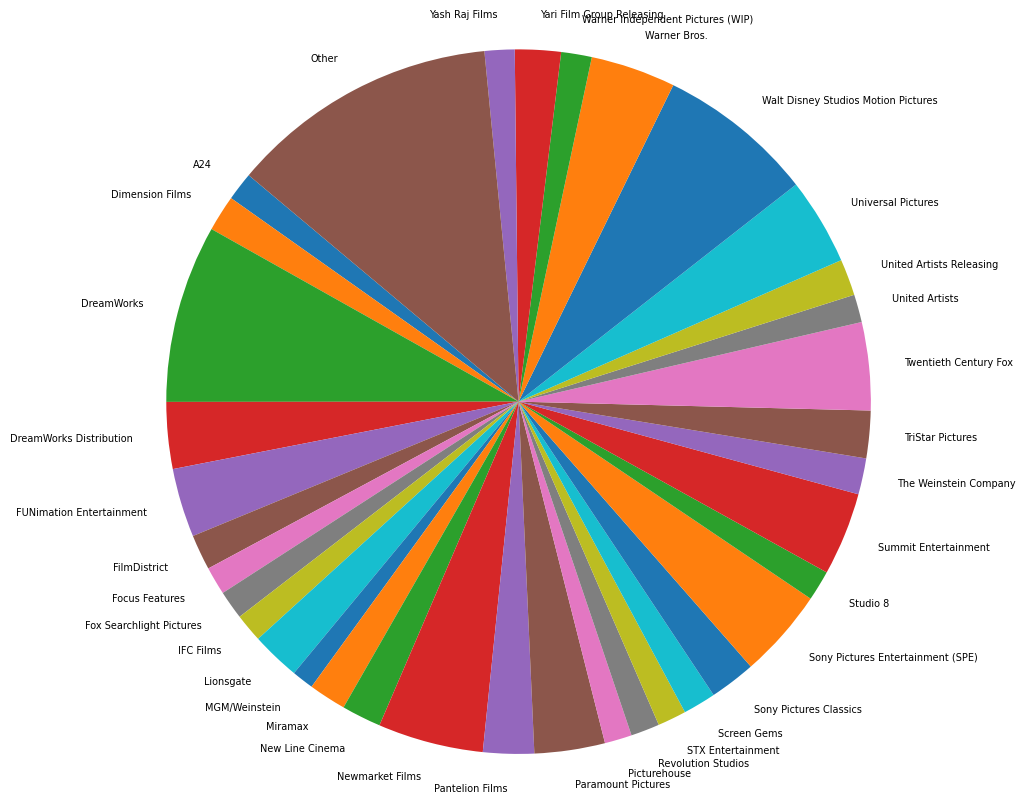

In [34]:
# Calculate percentage of each slice
sizes = filtered_df['profit']
total = sum(sizes)
percentages = sizes / total * 100

# Define a threshold percentage for small slices
threshold_percentage = 1  # Adjust threshold as needed

# Group small slices into "Other" category
other_size = sizes[percentages < threshold_percentage].sum()
filtered_sizes = sizes[percentages >= threshold_percentage]
filtered_labels = filtered_df.index[percentages >= threshold_percentage].tolist()
filtered_sizes = filtered_sizes.tolist() + [other_size]
filtered_labels.append('Other')

# Create a pie chart with grouped small slices as "Other"
plt.rcParams['font.size'] = 7
plt.figure(figsize=(10, 10))
plt.pie(filtered_sizes, labels=filtered_labels, startangle=140)
plt.axis('equal')
# plt.title('Distribution of Average Profit by Distributor (Excluding Small Slices)')
plt.show()

In [15]:
# Group by 'Distributor' and 'Genre', then count the number of movies in each genre for each distributor
genre_count_by_distributor = df_modified.groupby(['Distributor', 'main_genre']).size()
# Reset the index to make the result a DataFrame
genre_count_by_distributor = genre_count_by_distributor.reset_index(name='Movie Count')
# Display the total amount of each genre released by each distributor
print(genre_count_by_distributor)

                   Distributor main_genre  Movie Count
0         20th Century Studios     Family            1
1             8x Entertainment  Biography            1
2                          A24      Crime            2
3                          A24      Drama            1
4                          A24     Horror            1
..                         ...        ...          ...
442  Yari Film Group Releasing    Fantasy            1
443             Yash Raj Films    Romance            1
444             Yash Raj Films      Sport            1
445             Yash Raj Films   Thriller            2
446                      truTV     Comedy            1

[447 rows x 3 columns]


In [2]:
# # Create a Stacked Bar Chart
# plt.figure(figsize=(12, 6))

# genre_count_by_distributor.pivot(index='Distributor', columns='main_genre', values='Movie Count').plot(kind='bar', stacked=True, width = .8)

# plt.xlabel('Distributor')
# plt.ylabel('Movie Count')
# plt.title('Number of Movies in Each Genre Released by Each Distributor')
# plt.xticks(rotation=90, fontsize=6)
# plt.legend(title='Genre', bbox_to_anchor=(1, 1))
# plt.show()

<Figure size 1200x600 with 0 Axes>

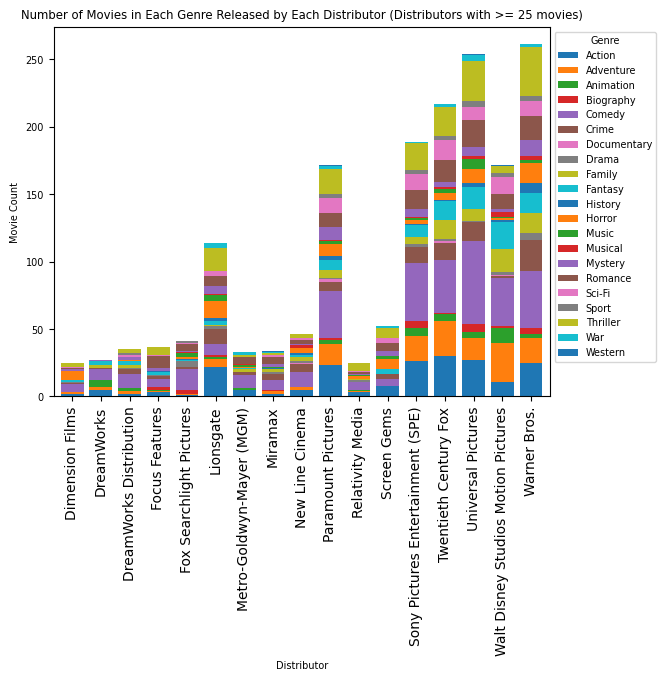

In [44]:
# Calculate the total number of movies for each distributor
distributor_movie_count = genre_count_by_distributor.groupby('Distributor')['Movie Count'].sum()

# Filter out distributors with less than 25 movies
filtered_distributors = distributor_movie_count[distributor_movie_count >= 25].index

# Filter the original DataFrame based on the filtered distributors
filtered_data = genre_count_by_distributor[genre_count_by_distributor['Distributor'].isin(filtered_distributors)]

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a Stacked Bar Chart with the filtered data
filtered_data.pivot(index='Distributor', columns='main_genre', values='Movie Count').plot(kind='bar', stacked=True, width=0.8)

plt.xlabel('Distributor')
plt.ylabel('Movie Count')
plt.title('Number of Movies in Each Genre Released by Each Distributor (Distributors with >= 25 movies)')
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))

plt.show()

<Figure size 1200x600 with 0 Axes>

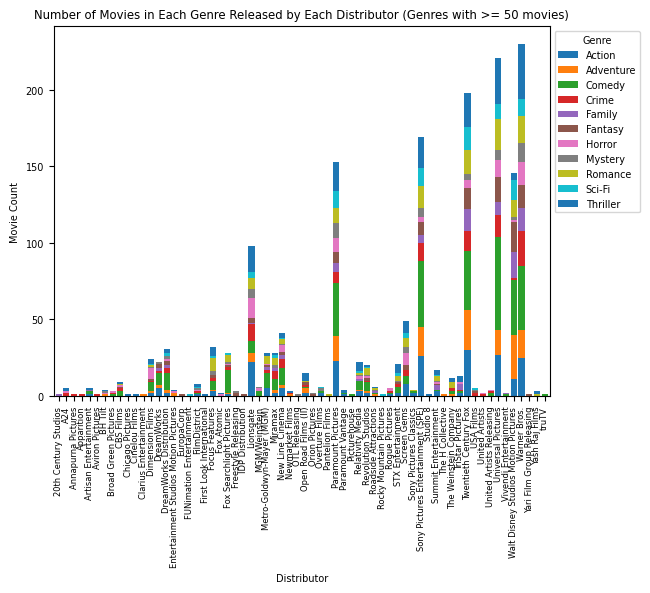

In [48]:
# Calculate the total count of movies for each genre
genre_movie_count = genre_count_by_distributor.groupby('main_genre')['Movie Count'].sum()

# Define the threshold for the minimum number of movies for a genre
min_movie_count_threshold = 50

# Filter out genres with less than the minimum movie count threshold
filtered_genres = genre_movie_count[genre_movie_count >= min_movie_count_threshold].index

# Filter the original DataFrame based on the filtered genres
filtered_data = genre_count_by_distributor[genre_count_by_distributor['main_genre'].isin(filtered_genres)]

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a Stacked Bar Chart with the filtered data
filtered_data.pivot(index='Distributor', columns='main_genre', values='Movie Count').plot(kind='bar', stacked=True, width=0.8)

plt.xlabel('Distributor')
plt.ylabel('Movie Count')
plt.title(f'Number of Movies in Each Genre Released by Each Distributor (Genres with >= {min_movie_count_threshold} movies)')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))

plt.show()

In [17]:
# df_modified.groupby('year')['Runtime'].mean()

In [18]:
# # Create a line chart
# plt.figure(figsize=(12, 6))
# plt.plot(average_runtime_per_year.index, average_runtime_per_year.values, marker='o', color='green', linestyle='-', linewidth=2)
# plt.xlabel('Year')
# plt.ylabel('Average Runtime')
# plt.title('Average Movie Runtime Over Time')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()